In [1]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

In [2]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
from deep_visual_odometry.kitti_utils import KITTIdata
from matplotlib import pyplot as plt
import pickle

In [3]:
basedir = 'dataset'

In [4]:
from deep_visual_odometry.odometry_model_v2 import OdomModelV2

In [5]:
batch_size = 32         # Sequences per batch
num_steps = 32         # Number of sequence steps per batch
rnn_size = 400          # Size of hidden layers in rnn_cell
num_layers = 4           # Number of hidden layers
learning_rate = 0.001   #learning rate

In [6]:
kitti_data = KITTIdata(basedir, 
                       sequences = ['00', '01', '02', '03','04','05','06','07','08'],
                       sequence_len = num_steps,
                       val_frac = 0,
                       test_frac = 0,
                       img_size=(150,50))

completed load sequence 00 data
completed load sequence 01 data
completed load sequence 02 data
completed load sequence 03 data
completed load sequence 04 data


KeyboardInterrupt: 

In [ ]:
kitti_data.normalize()

In [ ]:
model = OdomModelV2(batch_size = batch_size, 
                  num_steps = num_steps,
                  cell_type = 'GRU',
                  rnn_size = rnn_size,
                  num_layers = num_layers,
                  learning_rate = learning_rate)

In [ ]:
loss = model.train(kitti_data, max_count = 1500, save_every_n = 100, sequences = ['00', '02', '05', '08'])

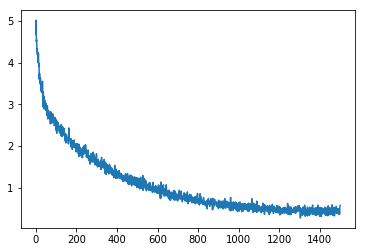

In [58]:
plt.plot(loss)

In [59]:
model_test = OdomModelV2(batch_size = batch_size, 
                  num_steps = num_steps,
                  cell_type = 'GRU',
                  rnn_size = rnn_size,
                  num_layers = num_layers,
                  learning_rate = learning_rate,
                  sampling = True)

created multi layer rnn cell
rolled out cell for num_steps 
reshaped outputs
shape of outputs (1, 1, 3)
shape of targets (1, 1, 3)
odometry model initialized


In [84]:
seq = '08'
inputs, inter_inputs, targets = kitti_data.get_full_sequence(sequence = seq)
inter_inputs.shape

(4070, 5)

In [ ]:
checkpoint = tf.train.latest_checkpoint('checkpoints')
predictions = model_test.test(checkpoint, inter_inputs)
predictions.shape

INFO:tensorflow:Restoring parameters from checkpoints/i1501_l400.ckpt


In [ ]:
j = 0
plt.plot(predictions[:,j],label = 'pred x')
plt.plot(targets[:,j],label = 'targets x')
plt.legend()
plt.savefig('x_predictions_RNN_iter1000.jpg')
plt.show()

In [ ]:

plt.plot(predictions[:,0],predictions[:,1],label = 'estimate')
plt.plot(targets[:,0],targets[:,1],label = 'ground truth')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
j = 1
plt.plot(predictions[:,j],label = 'pred y')
plt.plot(targets[:,j],label = 'targets y')
plt.legend()
plt.savefig('y_predictions_RNN_iter1000.jpg')
plt.show()

In [ ]:
j = 2
plt.plot(predictions[:,j],label = 'pred theta')
plt.plot(targets[:,j],label = 'targets theta')
plt.legend()
plt.savefig('theta_predictions_RNN_iter1000.jpg')
plt.show()